![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Grundbruch

Zunächst wiederholen wir einfache Konzepte. Wir rufen uns die Grenztheoreme in Bezug auf statische und kinematische Methoden der Grenzzustände der Tragfähigkeit in Erinnerung.

In [128]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import pandas as pd
import scipy as scp
from scipy import optimize
import sympy as sp
sp.init_printing(use_latex='mathjax') #makes sympy output look nice
import concurrent.futures as cf

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/KEM_plots.ipynb

## Reibungsfreier, gewichtsloser, kohäsiver Boden

Zunächst betrachten wir den Grenzzustand infolge einer Flächenlast $q$, die hier als streifenförmig betrachtet werden und auf der Breite $b$ wirken soll. Im Sinne der kinematischen Methoden wählen wir plausible Bruchmechanismen und stellen für diese die Gleichgewichtsbedingungen im Grenzzustand auf.

### Variante 1: Gleitkreis

Gleitkreismittelpunkt: $(x_\text{m},y_\text{m}) = (0,h)$

Gleitkreisradius: $r = \sqrt{h^2 + (b+a)^2} = \displaystyle \frac{b+a}{\sin \alpha/2}$

Gleitkreiswinkel: $\alpha = 2 \arctan \displaystyle \frac{b+a}{h}$

Treibendes Moment:

$$
    E_\text{M} = \frac{pb}{2} (b + 2a)
$$



Haltendes Moment:

$$
    R_\text{M} = c r l = c r^2 \alpha = c\frac{(b+a)^2}{\sin^2 \alpha/2} \alpha
$$

Den Ausnutzungsgrad $\mu$ erhalten wir hier durch das Verhältnis

$$
    \mu = \frac{E_\text{M}}{R_\text{M}} = \frac{pb (b+2a)\sin^2 (\alpha/2)}{2c(b+a)^2 \alpha}
$$

Die Lage des Gleitkreismittelpunktes ist noch unbekannt (2 Unbekannte) und soll im Folgenden durch Identifikation des ungünstigsten Gleitkreises ermittelt werden.

In [129]:
#HIDDEN
p, b, a, c, alpha, mu = sp.symbols('p b a c alpha mu')

In [130]:
mu = p*b*(b+2*a)*sp.sin(alpha/2)**2/(2*c*(b+a)**2*alpha)
mu

                 2⎛α⎞
b⋅p⋅(2⋅a + b)⋅sin ⎜─⎟
                  ⎝2⎠
─────────────────────
                 2   
    2⋅α⋅c⋅(a + b)    

Um die Extremwerte zu identifizieren, untersuchen wir die Ausdrücke

$$
    \frac{\partial \mu}{\partial a} = 0 \quad \text{und} \quad \frac{\partial \mu}{\partial \alpha} = 0
$$

Wir beginnen mit der Ableitung nach a:

In [131]:
dmu_da = sp.diff(mu,a)
dmu_da.simplify()

          2⎛α⎞ 
-a⋅b⋅p⋅sin ⎜─⎟ 
           ⎝2⎠ 
───────────────
             3 
  α⋅c⋅(a + b)  

Diese verschwindet für die trivialen Fälle $b=0$, $p=0$, $\alpha=0$ (mit der sinnvollen Beschränkung $\alpha \in [0,\pi]$). Als praktisch relevanter Fall bleibt $a=0$, d.h. der Gleitkreismittelpunkt liegt über dem Startpunkt der Flächenlast.

Wir schauen uns nun die Ableitung $\mu_{,\alpha}$ an und nutzen gleichzeitig die Einschränkung auf $a=0$ aus dem bisherigen Ergebnis.

In [132]:
dmu_dalpha = sp.diff(mu,alpha)
dmu_dalpha.subs(a,0).simplify()

p⋅(α⋅sin(α) + cos(α) - 1)
─────────────────────────
             2           
          4⋅α ⋅c         

Als nichttriviale Lösung verbleibt hier die Sucha nach der Nullstelle der Gleichung

$$
    f = \alpha \sin \alpha + \cos \alpha - 1
$$

Wir stellen diese Gleichung zunächst für das bessere Verständnis graphisch dar.

In [133]:
f = lambda x: x * np.sin(x) + np.cos(x) - 1

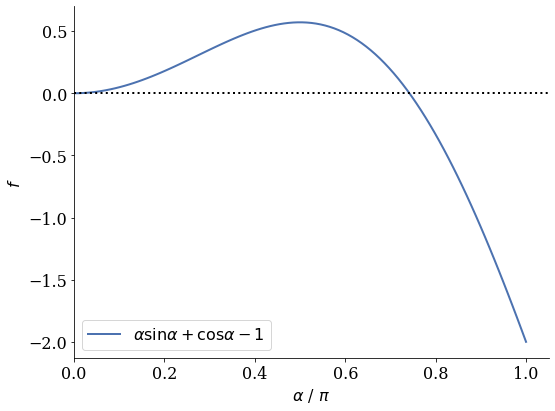

In [134]:
#HIDDEN
fig, ax = plt.subplots()
a_vals = np.linspace(0,np.pi,100)
ax.plot(a_vals/np.pi,f(a_vals),label='$\\alpha \\sin \\alpha + \\cos \\alpha - 1$')
ax.set_xlabel('$\\alpha$ / $\\pi$')
ax.set_ylabel('$f$')
ax.axhline(0,ls=':')
ax.set_xlim(left=0)
ax.legend();
fig.tight_layout();

Die Nullstelle bei $\alpha = 0$ ist praktisch irrelevant.

In [135]:
sol = scp.optimize.root(fun=f,x0=0.75*np.pi)

In [136]:
#HIDDEN
alpha = sol.x[0]
print("Der kritische Öffnungswinkel liegt bei %.2f°." %np.rad2deg(alpha))
h = 1/np.tan(alpha/2)
print("Der Gleitkreismittelpunkt liegt bei (0, %.3f b)." %h)
r = 1/np.sin(alpha/2)
print("Der Gleitkreisradius beträgt %.3f b." %r)

Der kritische Öffnungswinkel liegt bei 133.56°.
Der Gleitkreismittelpunkt liegt bei (0, 0.429 b).
Der Gleitkreisradius beträgt 1.088 b.


Die Last bei Grundbruch ergibt sich somit aus

$$
    \mu = 1 = \frac{p \sin^2 (\alpha/2)}{2c \alpha} \quad \rightarrow \quad p_\text{B} = 2 c \frac{\alpha}{\sin^2 (\alpha/2)}
$$

In [137]:
#HIDDEN
pB = 2 * alpha / np.sin(alpha/2)**2
print("Die Bruchlast beim Gleitkreis beträgt %.2f c." %pB)

Die Bruchlast beim Gleitkreis beträgt 5.52 c.


### Variante 2: Zusammengesetzter Bruchmechanismus mit geraden Gleitlinien

Wir betrachten den Dargestellten Bruchmechanismus, der beometrisch durch $b$ sowie $\vartheta_1$ und $\vartheta_2$ definiert ist.

**Aufgabe:** Begründen Sie anschaulich, warum die Gewichtskraft keine Rolle spielt (Hinweis: denken Sie an die Arbeit, die die Gewichtskraft im Gravitationsfeld verrichtet).

**Aufgabe:** Welche einschränkende Annahme versteckt sich in der Definition dieses Bruchmechanismus? Ist diese realistisch?

**Aufgabe:** Zeichnen Sie die Kräftepläne für die kinematischen Elemente für den kohäsiven, reibungs- und gewichtslosen Fall. Wiederholen Sie die Aufgabe für den gewichts- und reibungsbehafteten Fall.

5.447856619470131

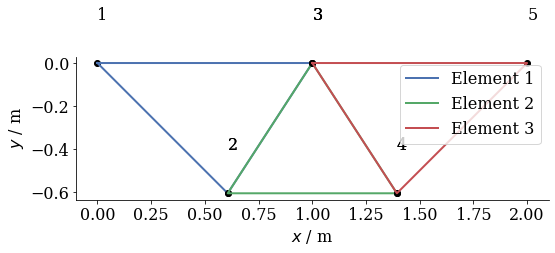

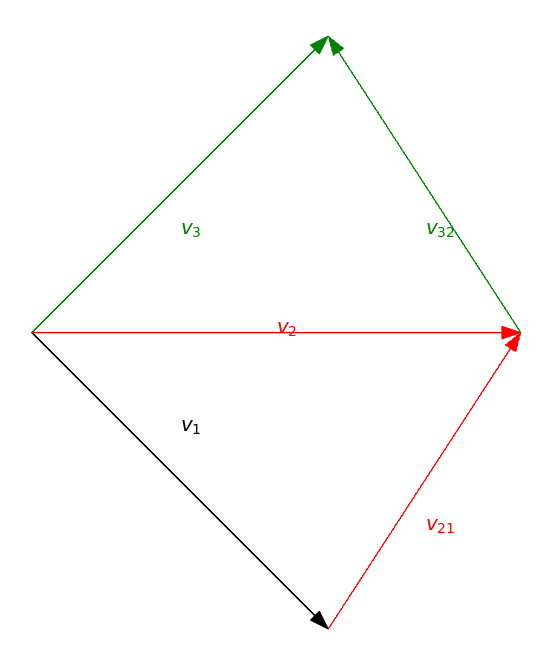

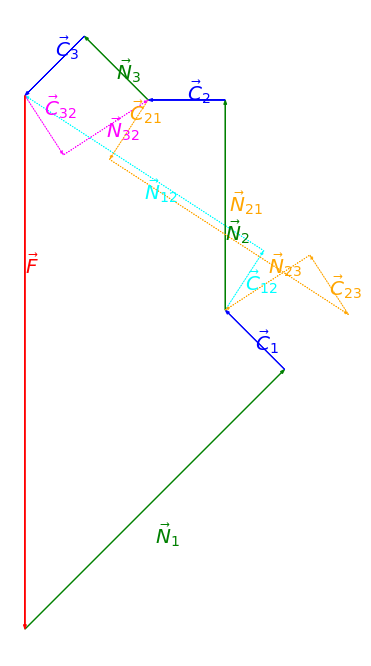

In [179]:
%run plot_functions/KEM_plots.ipynb
#t1,t2,b,p,c,plot
additional = (np.deg2rad(45),np.deg2rad(57),1,0,1,True)
get_pB_GB([1],*additional)